In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
cilium_tc_iperf_array = [4.51, 4.45, 4.51, 4.39, 4.42, 4.48, 4.49, 4.42, 4.60, 4.40]
cilium_socketlb_iperf_array = [4.48, 4.47, 4.44, 4.63, 4.59, 4.59, 4.58, 4.48, 4.56, 4.36]
crab_tc_iperf_array = [4.36, 4.42, 4.51, 4.33, 4.48, 4.37, 4.48, 4.41, 4.41, 4.45]

In [29]:
iperf_means = [np.mean(cilium_tc_iperf_array), np.mean(cilium_socketlb_iperf_array), np.mean(crab_tc_iperf_array)]
iperf_std_devs = [np.std(cilium_tc_iperf_array), np.std(cilium_socketlb_iperf_array), np.std(crab_tc_iperf_array)]

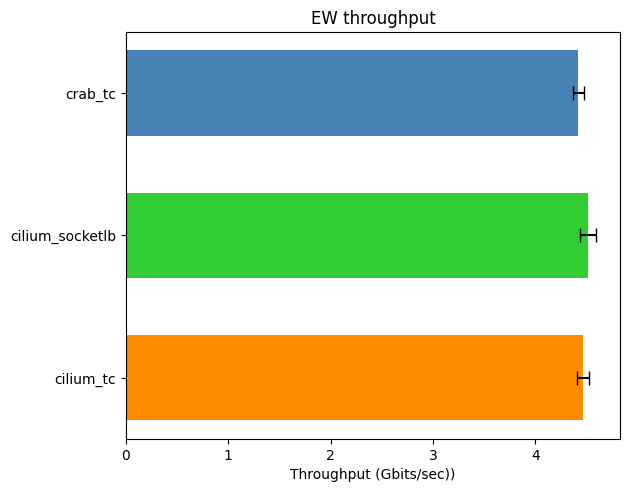

In [30]:
bar_positions = np.arange(len(iperf_means))
height = 0.6
colors = ['#FF8C00', '#32CD32', '#4682B4']
plt.barh(bar_positions, iperf_means, xerr=iperf_std_devs, color=colors, align='center', height = height, capsize=5)
plt.yticks(bar_positions, ['cilium_tc', 'cilium_socketlb', 'crab_tc'])
plt.xlabel('Throughput (Gbits/sec))')
plt.tight_layout()
plt.title("EW throughput")
plt.show()

In [31]:
cilium_tc_ew_RR = [[139,158,188], [140,158,189], [140,158,188], [139,158,188], [140,158,188], [139,158,188], [140,158,188], [141,162,202], [140,158,189], [140,158,188]]
cilium_socketlb_ew_RR = [[142,161,202], [141,161,199], [141,159,191], [140,158,189], [140,158,189], [140,158,189], [140,158,188], [140,158,189], [140,158,190], [140,159,190]]
crab_tc_ew_RR = [[140,159,201], [141,159,195], [140,158,189], [140,158,190], [140,158,189], [140,158,189], [140,158,191], [140,158,189], [141,159,193], [141,160,200]]

cilium_tc_ew_RR_50per = [x[0] for x in cilium_tc_ew_RR]
cilium_socketlb_ew_RR_50per = [x[0] for x in cilium_socketlb_ew_RR]
crab_tc_ew_RR_50per = [x[0] for x in crab_tc_ew_RR]
cilium_tc_ew_RR_90per = [x[1] for x in cilium_tc_ew_RR]
cilium_socketlb_ew_RR_90per = [x[1] for x in cilium_socketlb_ew_RR]
crab_tc_ew_RR_90per = [x[1] for x in crab_tc_ew_RR]
cilium_tc_ew_RR_99per = [x[2] for x in cilium_tc_ew_RR]
cilium_socketlb_ew_RR_99per = [x[2] for x in cilium_socketlb_ew_RR]
crab_tc_ew_RR_99per = [x[2] for x in crab_tc_ew_RR]

ew_RR_50per_means = [np.mean(cilium_tc_ew_RR_50per), np.mean(cilium_socketlb_ew_RR_50per), np.mean(crab_tc_ew_RR_50per)]
ew_RR_90per_means = [np.mean(cilium_tc_ew_RR_90per), np.mean(cilium_socketlb_ew_RR_90per), np.mean(crab_tc_ew_RR_90per)]
ew_RR_99per_means = [np.mean(cilium_tc_ew_RR_99per), np.mean(cilium_socketlb_ew_RR_99per), np.mean(crab_tc_ew_RR_99per)]

ew_RR_50per_stds = [np.std(cilium_tc_ew_RR_50per), np.std(cilium_socketlb_ew_RR_50per), np.std(crab_tc_ew_RR_50per)]
ew_RR_90per_stds = [np.std(cilium_tc_ew_RR_90per), np.std(cilium_socketlb_ew_RR_90per), np.std(crab_tc_ew_RR_90per)]
ew_RR_99per_stds = [np.std(cilium_tc_ew_RR_99per), np.std(cilium_socketlb_ew_RR_99per), np.std(crab_tc_ew_RR_99per)]


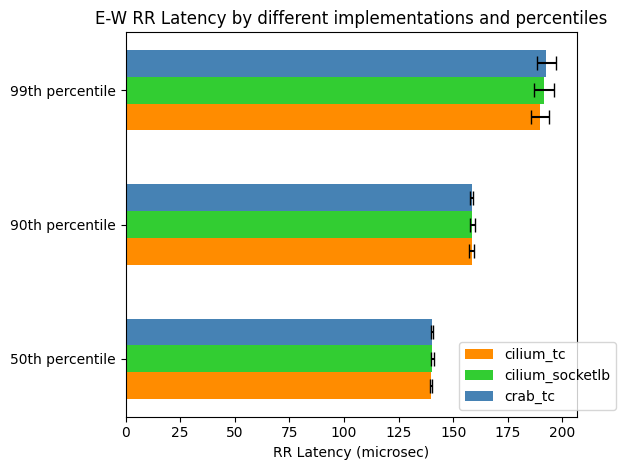

In [32]:

percentiles = ['50th percentile', '90th percentile', '99th percentile']
labels = ['cilium_tc', 'cilium_socketlb', 'crab_tc']
colors = ['#FF8C00', '#32CD32', '#4682B4']

num_datasets = len(labels)
num_percentiles = len(percentiles)
x = np.arange(num_percentiles)
width = 0.2

fig, ax = plt.subplots()

# Bars for each percentile
for i, (means, stds) in enumerate([(ew_RR_50per_means, ew_RR_50per_stds), 
                                  (ew_RR_90per_means, ew_RR_90per_stds), 
                                  (ew_RR_99per_means, ew_RR_99per_stds)]):

    for j in range(num_datasets):
        position = x[i] - num_datasets / 2 * width + j * width + width / 2
        label = labels[j] if i == 0 else None
        ax.barh(position, means[j], width, xerr=stds[j], color=colors[j], capsize=5, 
                label=label)

ax.set_xlabel('RR Latency (microsec)')
ax.set_title('E-W RR Latency by different implementations and percentiles')
ax.set_yticks(x)
ax.set_yticklabels(percentiles)
ax.legend(loc='lower right', bbox_to_anchor=(1.1, 0))

plt.tight_layout()
plt.show()

In [33]:
cilium_tc_ew_CRR = [[660,751,921], [660,756,1019], [654,742,1019], [653,740,1090], [654,740,954], [654,745,1324], [653,739,972], [652,741,1226], [654,750,1623], [655,745,1027]]
cilium_socketlb_ew_CRR = [[677,770,909], [676,779,1370], [675,788,1733], [673,767,1290], [672,773,1539], [674,771,1519], [673,762,1180], [675,776,1777], [674,766,991], [677,772,921]]
crab_tc_ew_CRR = [[702,794,930], [704,799,912], [705,801,923], [708,805,940], [709,809,963], [776,886,993], [729,846,1050], [708,815,960], [705,800,912], [696,774,960]]

cilium_tc_ew_CRR_50per = [x[0] for x in cilium_tc_ew_CRR]
cilium_socketlb_ew_CRR_50per = [x[0] for x in cilium_socketlb_ew_CRR]
crab_tc_ew_CRR_50per = [x[0] for x in crab_tc_ew_CRR]

cilium_tc_ew_CRR_90per = [x[1] for x in cilium_tc_ew_CRR]
cilium_socketlb_ew_CRR_90per = [x[1] for x in cilium_socketlb_ew_CRR]
crab_tc_ew_CRR_90per = [x[1] for x in crab_tc_ew_CRR]

cilium_tc_ew_CRR_99per = [x[2] for x in cilium_tc_ew_CRR]
cilium_socketlb_ew_CRR_99per = [x[2] for x in cilium_socketlb_ew_CRR]
crab_tc_ew_CRR_99per = [x[2] for x in crab_tc_ew_CRR]

ew_CRR_50per_means = [np.mean(cilium_tc_ew_CRR_50per), np.mean(cilium_socketlb_ew_CRR_50per), np.mean(crab_tc_ew_CRR_50per)]
ew_CRR_90per_means = [np.mean(cilium_tc_ew_CRR_90per), np.mean(cilium_socketlb_ew_CRR_90per), np.mean(crab_tc_ew_CRR_90per)]
ew_CRR_99per_means = [np.mean(cilium_tc_ew_CRR_99per), np.mean(cilium_socketlb_ew_CRR_99per), np.mean(crab_tc_ew_CRR_99per)]

ew_CRR_50per_stds = [np.std(cilium_tc_ew_CRR_50per), np.std(cilium_socketlb_ew_CRR_50per), np.std(crab_tc_ew_CRR_50per)]
ew_CRR_90per_stds = [np.std(cilium_tc_ew_CRR_90per), np.std(cilium_socketlb_ew_CRR_90per), np.std(crab_tc_ew_CRR_90per)]
ew_CRR_99per_stds = [np.std(cilium_tc_ew_CRR_99per), np.std(cilium_socketlb_ew_CRR_99per), np.std(crab_tc_ew_CRR_99per)]

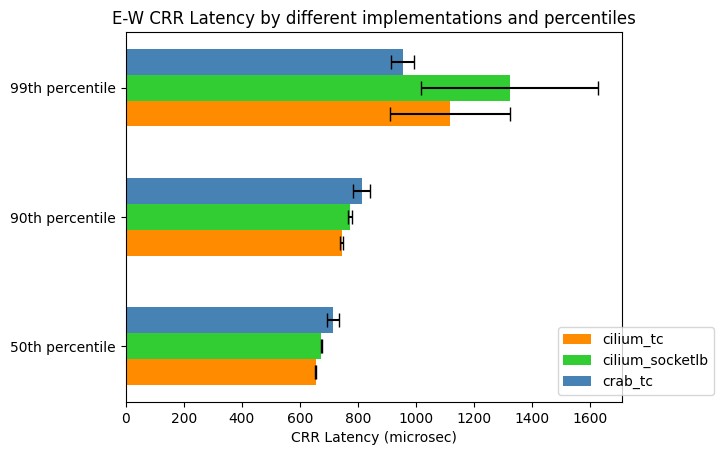

59.30000000000007


In [34]:
percentiles = ['50th percentile', '90th percentile', '99th percentile']
labels = ['cilium_tc', 'cilium_socketlb', 'crab_tc']
colors = ['#FF8C00', '#32CD32', '#4682B4']

num_datasets = len(labels)
num_percentiles = len(percentiles)
x = np.arange(num_percentiles)
width = 0.2

fig, ax = plt.subplots()

# Bars for each percentile
for i, (means, stds) in enumerate([(ew_CRR_50per_means, ew_CRR_50per_stds), 
                                  (ew_CRR_90per_means, ew_CRR_90per_stds), 
                                  (ew_CRR_99per_means, ew_CRR_99per_stds)]):

    for j in range(num_datasets):
        position = x[i] - num_datasets / 2 * width + j * width + width / 2
        label = labels[j] if i == 0 else None
        ax.barh(position, means[j], width, xerr=stds[j], color=colors[j], capsize=5, 
                label=label)

ax.set_xlabel('CRR Latency (microsec)')
ax.set_title('E-W CRR Latency by different implementations and percentiles')
ax.set_yticks(x)
ax.set_yticklabels(percentiles)
ax.legend(loc='lower right', bbox_to_anchor=(1.2, 0))

plt.show()
print(ew_CRR_50per_means[2] - ew_CRR_50per_means[0])

In [35]:
cilium_tc_iperf_array = [742, 750, 760, 782, 759, 768, 754, 762, 755, 786]
crab_tc_iperf_array = [760, 803, 795, 760, 732, 760, 761, 760, 760, 759]
iperf_means = [np.mean(cilium_tc_iperf_array), np.mean(crab_tc_iperf_array)]
iperf_std = [np.std(cilium_tc_iperf_array), np.std(crab_tc_iperf_array)]

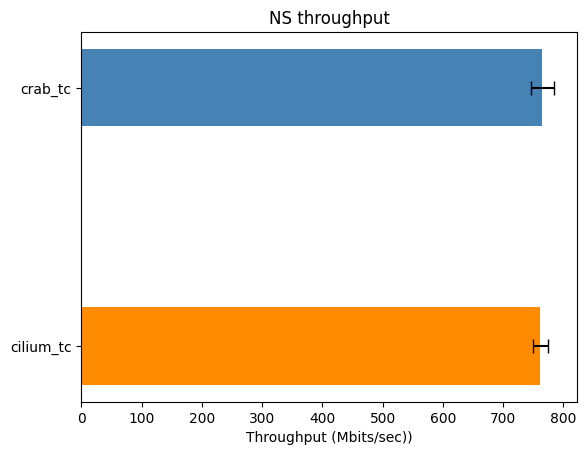

In [36]:
bar_positions = np.arange(len(iperf_means))
height = 0.3
colors = ['#FF8C00', '#4682B4']
plt.barh(bar_positions, iperf_means, xerr=iperf_std, color=colors, align='center', height = height, capsize=5)
plt.yticks(bar_positions, ['cilium_tc', 'crab_tc'])
plt.xlabel('Throughput (Mbits/sec))')

plt.title("NS throughput")
plt.show()

In [37]:
cilium_curl = [[.002449,.004070],[.002469,.003984],[.002453,.003943],[.002432,.003887],[.002606,.004193],[.002585,.004153],[.002686,.004279],[.002664,.004240],[.002596,.004114],[.002577,.004068],[.002595,.004092],[.002589,.004066],[.002615,.004067],[.002803,.004389],[.002711,.004235],[.002692,.004198],[.002753,.004269],[.002707,.004192],[.002693,.004158],[.002739,.004241],[.002759,.004259],[.002742,.004217],[.002988,.004480],[.002765,.004266],[.002719,.004200],[.002747,.004257],[.002849,.004462],[.002780,.004254],[.003029,.004551],[.003023,.004534],[.002778,.004255],[.002799,.004284],[.002816,.004307],[.002700,.004168],[.002719,.004201],[.002754,.004246],[.002754,.004286],[.002754,.004224],[.002867,.004387],[.002851,.004377],[.002903,.004426],[.002863,.004398],[.002716,.004192],[.002740,.004212],[.002790,.004283],[.002758,.004240],[.002790,.004272],[.003026,.004540],[.002955,.004533],[.002873,.004401],[.003017,.004532],[.002724,.004213],[.002938,.004534],[.002936,.004565],[.002786,.004285],[.002927,.004538],[.003104,.004668],[.002831,.004321],[.002875,.004379],[.002860,.004475],[.002823,.004380],[.002770,.004295],[.002792,.004285],[.002770,.004241],[.002776,.004270],[.002812,.004319],[.002831,.004337],[.002818,.004324],[.002715,.004225],[.002725,.004221],[.002714,.004212],[.002807,.004294],[.002764,.004265],[.002833,.004360],[.002831,.004495],[.002786,.004275],[.002804,.004287],[.002971,.004490],[.002713,.004189],[.002747,.004227],[.002781,.004485],[.002779,.004262],[.002780,.004267],[.003011,.004533],[.002810,.004314],[.002833,.004355],[.002969,.004472],[.002748,.004243],[.002756,.004281],[.002977,.004507],[.002775,.004268],[.002778,.004256],[.002823,.004328],[.002821,.004326],[.002837,.004311],[.002767,.004263],[.002775,.004277],[.002734,.004216],[.002984,.004512],[.002796,.004283]]
crab_curl = [[.002465,.004091],[.002482,.004067],[.002481,.004038],[.002496,.004060],[.002538,.004328],[.002511,.004074],[.002547,.004110],[.002564,.004153],[.002575,.004150],[.002617,.004220],[.002670,.004277],[.002657,.004262],[.002650,.004251],[.002683,.004310],[.002686,.004278],[.002674,.004250],[.002678,.004236],[.002718,.004290],[.002720,.004296],[.002726,.004283],[.002753,.004382],[.002762,.004326],[.002782,.004359],[.002785,.004398],[.002723,.004306],[.002805,.004451],[.003117,.004837],[.002819,.004413],[.002812,.004391],[.002904,.004532],[.002986,.004650],[.003126,.004776],[.002877,.004528],[.002739,.004316],[.002980,.004567],[.002801,.004373],[.002767,.004337],[.002852,.004442],[.002827,.004440],[.002813,.004394],[.002853,.004460],[.002807,.004411],[.002699,.004281],[.002771,.004381],[.002805,.004394],[.002821,.004410],[.002865,.004714],[.002887,.004514],[.002837,.004431],[.003006,.004653],[.002742,.004327],[.002722,.004326],[.002953,.004557],[.002784,.004361],[.002793,.004361],[.002797,.004417],[.002888,.004505],[.002818,.004410],[.002880,.004485],[.002805,.004400],[.002748,.004340],[.002760,.004345],[.002796,.004381],[.002788,.004366],[.002808,.004375],[.002845,.004440],[.002824,.004400],[.002825,.004397],[.002797,.004414],[.002713,.004280],[.002763,.004333],[.002790,.004391],[.002794,.004364],[.002800,.004412],[.002861,.004461],[.002830,.004409],[.002817,.004390],[.002974,.004579],[.002743,.004328],[.002774,.004384],[.002971,.004567],[.002772,.004355],[.002816,.004396],[.002868,.004479],[.002839,.004430],[.002825,.004403],[.002843,.004539],[.002787,.004407],[.002757,.004308],[.002895,.004604],[.002830,.004407],[.002812,.004405],[.002843,.004446],[.002842,.004423],[.002769,.004327],[.002958,.004553],[.002743,.004306],[.002804,.004402],[.002867,.004536],[.002849,.004450],]
# first item
cilium_curl_connection = [x[0] for x in cilium_curl]
crab_curl_connection = [x[0] for x in crab_curl]
# second item
cilium_curl_total = [x[1] for x in cilium_curl]
crab_curl_total = [x[1] for x in crab_curl]

curl_connection_means = [np.mean(cilium_curl_connection) * 1000000, np.mean(crab_curl_connection) * 1000000]
curl_total_means = [np.mean(cilium_curl_total) * 1000000, np.mean(crab_curl_total) * 1000000]
curl_connection_stds = [np.std(cilium_curl_connection) * 1000000, np.std(crab_curl_connection) * 1000000]
curl_total_stds = [np.std(cilium_curl_total) * 1000000, np.std(crab_curl_total) * 1000000]


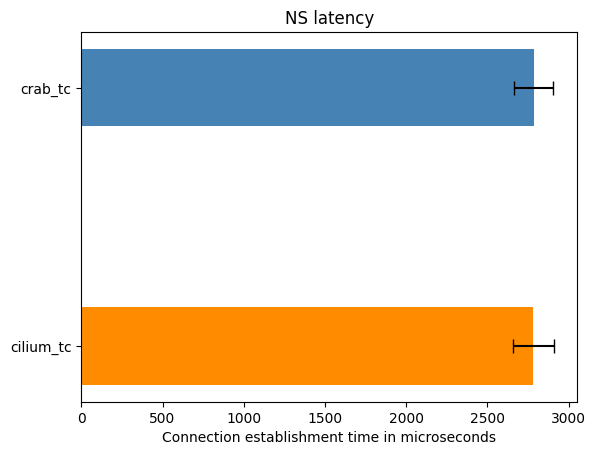

0.8599999999987631


In [38]:
# plot
bar_positions = np.arange(len(curl_connection_means))
height = 0.3
colors = ['#FF8C00', '#4682B4']
plt.barh(bar_positions, curl_connection_means, xerr=curl_connection_stds, color=colors, align='center', height = height, capsize=5)
plt.yticks(bar_positions, ['cilium_tc', 'crab_tc'])
plt.xlabel('Connection establishment time in microseconds')

plt.title("NS latency")
plt.show()
print(curl_connection_means[1] - curl_connection_means[0])

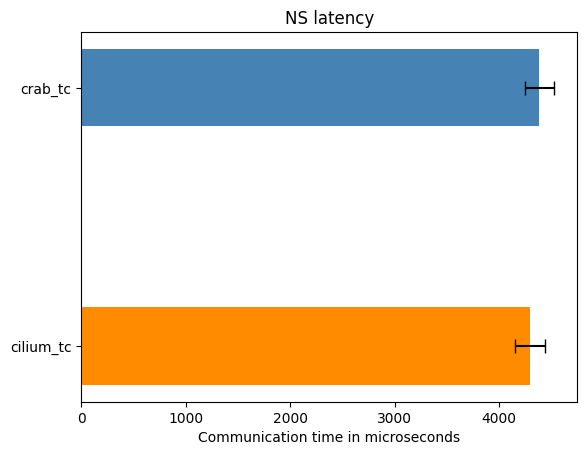

87.61999999999898


In [39]:
bar_positions = np.arange(len(curl_total_means))
height = 0.3
colors = ['#FF8C00', '#4682B4']
plt.barh(bar_positions, curl_total_means, xerr=curl_total_stds, color=colors, align='center', height = height, capsize=5)
plt.yticks(bar_positions, ['cilium_tc', 'crab_tc'])
plt.xlabel('Communication time in microseconds')

plt.title("NS latency")
plt.show()
print(curl_total_means[1] - curl_total_means[0])